In [147]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft

Synthesize a discrete-time signal by using the IDFT in matrix notation
for different values of N. Show the matrices W and K. Plot the signal
synthesized.

##IDFT Signal Synthesis for N=10

Let us synthesize a discrete-time signal by using the IDFT in matrix notation for $N=8$.

The signal should contain a DC value, the first and second eigenfrequency with different amplitudes, such as

\begin{equation}
\mathbf{x}_\mu = [6, 8, 2, 4, 3, 4, 5, 0, 0, 0]^\text{T}
\end{equation}

using large `X_test` in code.

True
K:  [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]]
W:  [[ 1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j]
 [ 1.        +0.00000000e+00j  0.80901699+5.87785252e-01j
   0.30901699+9.51056516e-01j -0.30901699+9.51056516e-01j
  -0.80901699+5.87785252e-01j -1.        +1.22464680e-16j
  -0.80901699-5.87785252e-01j -0.30901699-9.51056516e-01j
   0.30901699-9.51056516e-01j  0.80901699-5.87785252e-01j]
 [ 1.        +0.00000000e+00j  0.30901699+9.51056516e-01j
  -0.80901699+5.

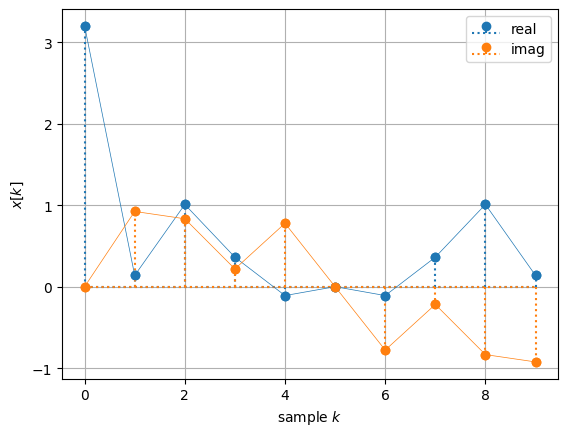

In [148]:
N=10

k = np.arange(N)
mu = np.arange(N)

# set up matrices
K = np.outer(k, mu)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix fors DFT

X_test = np.array([6, 8, 2, 4, 3, 4, 5, 0, 0, 0])
x_test = 1/N*W@X_test

plt.stem(k, np.real(x_test), label='real',
             markerfmt='C0o', basefmt='C0:', linefmt='C0:')

plt.stem(k, np.imag(x_test), label='imag',
             markerfmt='C1o', basefmt='C1:', linefmt='C1:')
#connecting the samples by lines is actually wrong,
# it is used simply for more visual convenience
plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

# check if results are identical with numpy ifft package
print(np.allclose(ifft(X_test), x_test))
print('K: ', K)
print('W: ', W)

In [149]:
if N == 10:
    x_test2 = X_test[0] * W[:, 0] + X_test[1] * W[:, 1] + X_test[2] * W[:, 2]

In [150]:
if N == 10:
    x_test2 *= 1/N
    print(np.allclose(x_test, x_test2))  # check with result before

False


In [151]:
if N == 10:
    # X_test2 = np.conj(W)@x_test  # >= Python3.5
    X_test2 = np.matmul(np.conj(W), x_test)  # DFT, i.e. analysis
    print(np.allclose(X_test, X_test2))  # check with result before

True


In [152]:
if N == 10:
    print(np.allclose(fft(x_test), X_test))

True


In [153]:
if N == 10:
    print(np.conj(W[:, 0])@x_test)
    print(np.conj(W[:, 1])@x_test)
    print(np.conj(W[:, 2])@x_test)

(6.000000000000001+6.661338147750939e-16j)
(8+7.91033905045424e-16j)
(1.9999999999999996+1.6653345369377348e-16j)
